[Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Data Exploration

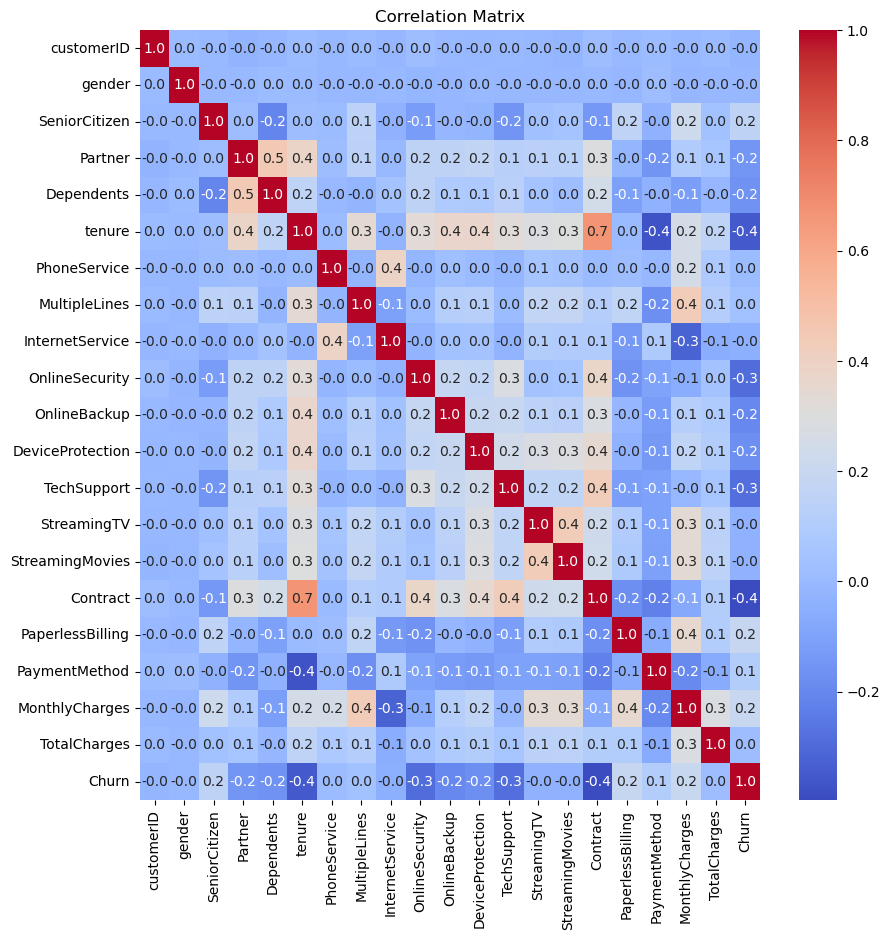

In [3]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

for col in df_encoded.select_dtypes(include=['object', 'category']):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

corr = df_encoded.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Correlation Matrix")
plt.show()

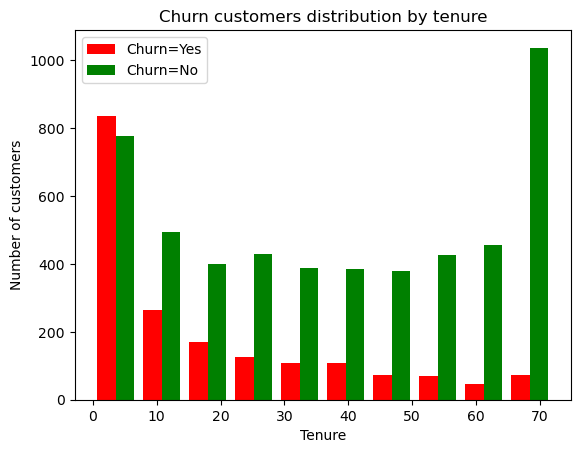

In [4]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn=Yes', 'Churn=No'], color=['red', 'green'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.title('Churn customers distribution by tenure')
plt.show()

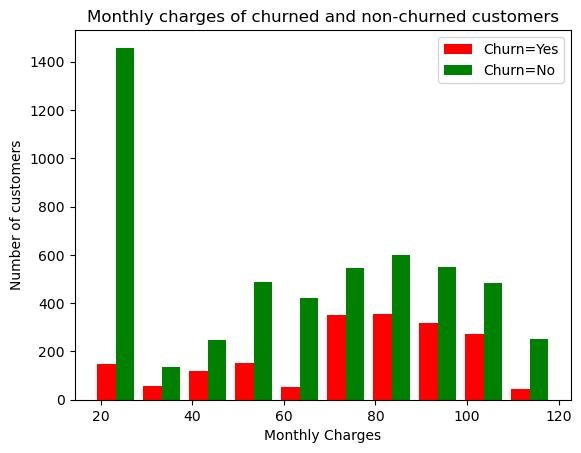

In [5]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges

plt.hist([mc_churn_yes, mc_churn_no], label=['Churn=Yes', 'Churn=No'], color=['red', 'green'])
plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('Number of customers')
plt.title('Monthly charges of churned and non-churned customers')
plt.show()

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Pre-processing

In [8]:
df = df.drop('customerID', axis=1)

In [9]:
df = df[df.TotalCharges!=' ']

df['TotalCharges'] = df['TotalCharges'].astype(float)

## Scaling


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges'] # not in 0 to 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

## Encoding Categorical Variables

In [12]:
for column in df:
  if df[column].dtypes == 'object':
    print(f'{column}: {df[column].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [13]:
df = df.replace('No internet service', 'No')
df = df.replace('No phone service', 'No')

In [14]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
  df[col].replace({'Yes': 1, 'No': 0}, inplace=True)

In [15]:
df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [16]:
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)

In [17]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

## Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split

X, y = df.drop('Churn', axis=1), df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts())

Churn
0    4130
1    1495
Name: count, dtype: int64


## Data Balancing

In [19]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(y_train_res.value_counts())

Churn
1    4130
0    4130
Name: count, dtype: int64


# Model Training

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')

lr_model.fit(X_train_res, y_train_res)

y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.749822316986496
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.52      0.74      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.75      0.76      1407



## KNeighbors Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
}

kn_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv =5)

kn_model.fit(X_train_res, y_train_res)

kn_model.best_params_

y_pred = kn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6993603411513859
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1033
           1       0.45      0.59      0.51       374

    accuracy                           0.70      1407
   macro avg       0.64      0.66      0.65      1407
weighted avg       0.73      0.70      0.71      1407



## Support Vector Classifier

In [27]:
from sklearn.svm import SVC

svm = SVC()

param_grid = {
    "C": [0.01, 0.1, 0.5, 1],
    "kernel": ["linear", "rbf", "poly"],
}

svc_model = GridSearchCV(svm, param_grid, cv =5)

svc_model.fit(X_train_res, y_train_res)

svc_model.best_params_

y_pred = svc_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7469793887704336
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1033
           1       0.52      0.72      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



## Decision Tree, Random Forest and XGBoost



In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric="logloss", use_label_encoder=False)
}

cv_scores = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name} with default parameters...")
    scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.4f}")
    print("-"*70)


Training Decision Tree with default parameters...
Decision Tree cross-validation accuracy: 0.7682
----------------------------------------------------------------------

Training Random Forest with default parameters...
Random Forest cross-validation accuracy: 0.8392
----------------------------------------------------------------------

Training XGBoost with default parameters...
XGBoost cross-validation accuracy: 0.8281
----------------------------------------------------------------------


In [24]:
cv_scores

{'Decision Tree': array([0.72760291, 0.7409201 , 0.78692494, 0.7972155 , 0.78813559]),
 'Random Forest': array([0.79782082, 0.81719128, 0.85290557, 0.85653753, 0.8716707 ]),
 'XGBoost': array([0.75242131, 0.80326877, 0.85653753, 0.86380145, 0.86440678])}

In [25]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [26]:
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7604832977967306
Confusion Matrix:
 [[836 197]
 [140 234]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1033
           1       0.54      0.63      0.58       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.77      0.76      0.77      1407



In [27]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(eval_metric="logloss", random_state=42)

xgb_model.fit(X_train_res, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [28]:
y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7547974413646056
              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1033
           1       0.53      0.65      0.58       374

    accuracy                           0.75      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.77      0.75      0.76      1407



## Artificial Neural Network (ANN)

In [29]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_res, y_train_res, epochs=100)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7007 - loss: 0.5769 
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7737 - loss: 0.4746 
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7782 - loss: 0.4671 
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7794 - loss: 0.4607 
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7815 - loss: 0.4562 
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7850 - loss: 0.4511 
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7897 - loss: 0.4462 
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7919 - loss: 0.4411 
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7984 - loss: 0.4372 
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.4331 
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8028 - loss: 0.4302 
Epoch 12/100
259/259 ━━━━━━━━━

### ANN Evaluation

In [30]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7662 - loss: 0.5258  


[0.5257523059844971, 0.7661691308021545]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.58      0.57       374

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.70      1407
weighted avg       0.77      0.77      0.77      1407



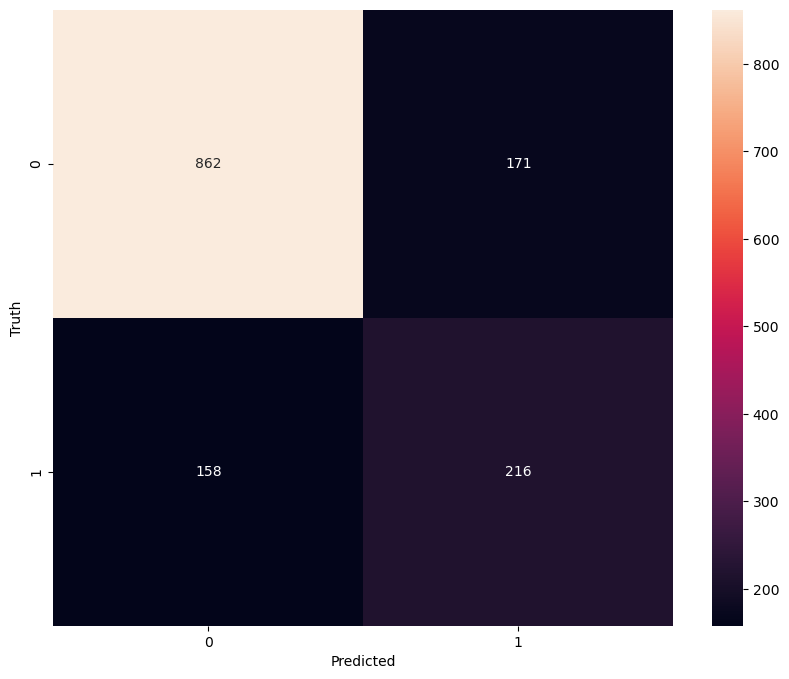

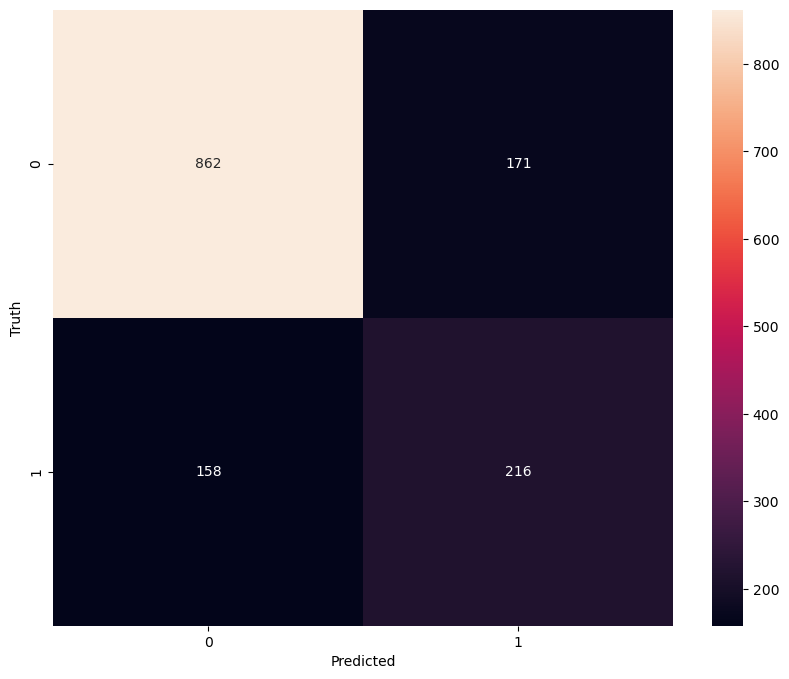

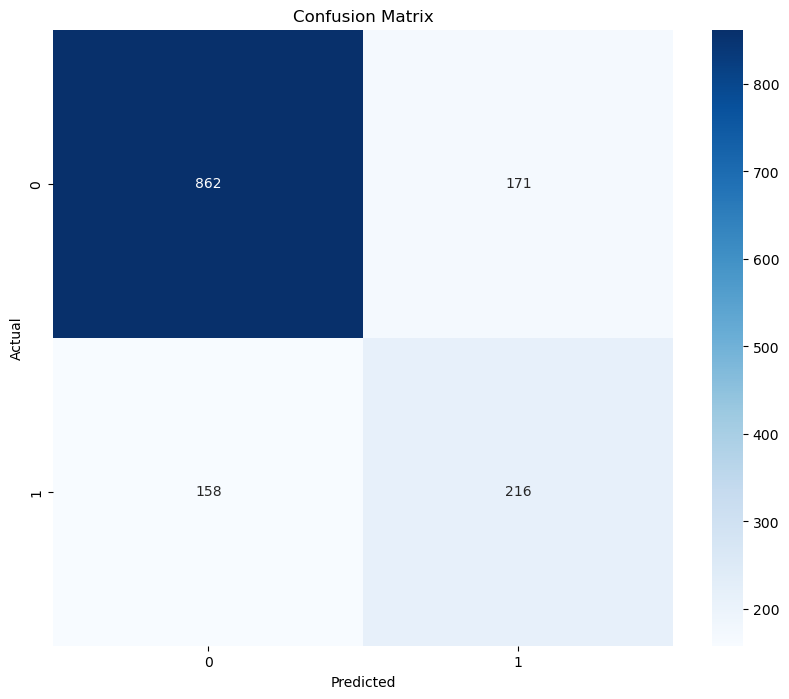

In [34]:
yp = model.predict(X_test)

y_pred = [1 if x > 0.5 else 0 for x in yp]

print(classification_report(y_test, y_pred))

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()